C:\Users\User
C:\Users\User\Modeling\
105
180
11
Fold 0:
  Training dataset index: [  1   2   3   5   6   7   8   9  11  13  14  15  16  17  19  20  21  22
  23  24  25  27  28  29  32  34  35  36  37  38  39  40  41  42  43  44
  46  48  49  50  51  52  54  55  56  57  58  59  60  61  62  63  66  67
  68  69  70  71  72  73  74  75  76  78  79  81  82  83  84  85  86  87
  88  90  91  92  93  95  97  98 100 101 102 103]
  Test dataset index: [  0   4  10  12  18  26  30  31  33  45  47  53  64  65  77  80  89  94
  96  99 104]
Fold 1:
  Training dataset index: [  0   1   2   3   4   6   7   8  10  12  13  14  17  18  19  20  21  23
  24  25  26  27  29  30  31  32  33  34  36  37  38  41  43  45  46  47
  48  49  50  51  52  53  54  57  58  59  60  61  63  64  65  66  67  68
  69  70  71  73  74  75  77  80  81  82  83  84  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 104]
  Test dataset index: [  5   9  11  15  16  22  28  35  39  40  42  44  55  56  62  72  76

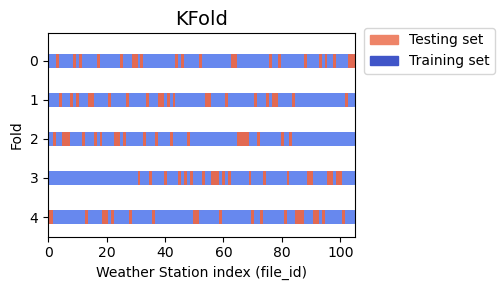

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
(15120, 3)
(15120, 3)
(15120, 3)
(15120, 3)
(15120, 3)


In [2]:
#Uses code taken from https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

import os
import csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import numpy as np
import pandas as pd

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

def plot_kfold(cv, X, y, ax, n_splits, xlim_max=105):

    #Plots the indices for a cross-validation object.
    #Taken from https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/

    #Parameters:
    #cv: Cross-validation object
    #X: Feature set
    #y: Target variable
    #ax: Matplotlib axis object
    #n_splits: Number of folds in the cross-validation
    #xlim_max: Maximum limit for the x-axis
    
    # Set color map for the plot
    cmap_cv = plt.cm.coolwarm
    cv_split = cv.split(X=X, y=y)
    
    for i_split, (train_idx, test_idx) in enumerate(cv_split):
        # Create an array of NaNs and fill in training/testing indices
        indices = np.full(len(X), np.nan)
        indices[test_idx], indices[train_idx] = 1, 0
        
        # Plot the training and testing indices
        ax_x = range(len(indices))
        ax_y = [i_split + 0.5] * len(indices)
        ax.scatter(ax_x, ax_y, c=indices, marker="_", 
                   lw=10, cmap=cmap_cv, vmin=-0.2, vmax=1.2)

    # Set y-ticks and labels
    y_ticks = np.arange(n_splits) + 0.5
    ax.set(yticks=y_ticks, yticklabels=range(n_splits),
           xlabel="Weather Station index (file_id)", ylabel="Fold",
           ylim=[n_splits, -0.2], xlim=[0, xlim_max])

    # Set plot title and create legend
    ax.set_title("KFold", fontsize=14)
    legend_patches = [Patch(color=cmap_cv(0.8), label="Testing set"),
                      Patch(color=cmap_cv(0.02), label="Training set")]
    ax.legend(handles=legend_patches, loc=(1.03, 0.8))

#Main

# Create 2D array with file_ids to use for sample creation
array = np.array([
    6501, 6541, 6640, 6668, 6678, 
    6687, 6697, 6714, 6744, 6772, 
    6783, 6840, 6844, 6854, 6870, 
    6891, 6895, 6899, 6901, 6909, 
    6929, 6950, 6963, 6969, 6994, 
    7032, 7057, 7094, 7095, 7100, 
    7108, 7116, 7119, 7131, 7139, 
    7152, 7155, 7156, 7182, 7193, 
    7202, 7239, 7280, 7286, 7287, 
    7311, 7321, 7329, 7347, 7350, 
    7354, 7357, 7361, 7414, 7423, 
    7424, 7432, 7463, 7482, 7489, 
    7528, 7531, 7534, 7538, 7549, 
    7553, 7555, 7562, 7571, 7573, 
    7574, 7575, 7585, 7599, 7603, 
    7606, 7622, 7652, 7671, 7704, 
    7786, 7805, 7816, 7838, 7861, 
    7862, 7863, 7870, 7892, 7907, 
    7938, 7962, 7979, 7987, 7999, 
    8000, 8034, 8083, 8120, 8133, 
    8184, 8186, 8247, 8248, 9858])

# Get the current working directory 
current_directory = os.getcwd() 

# Print the current working directory 
print(current_directory)

# Define the directory containing the files 
path = current_directory+"\\Modeling\\"
print(path)

filename = path + 'Final_Monthly_Dataset.csv'

# load dataset
df = read_csv(filename, header=0, parse_dates=[0], index_col=0, date_format='%Y-%m')

df = df.rename(columns={'Unnamed: 0' : 'indices'})

#Remove unused columns
df = df.drop(['Day', 'vapor_pressure'], axis=1)

# Round numbers in columns to reasonable precision
df['temperatures'] = np.round(df['temperatures'], 2)
df['slp'] = np.round(df['slp'], 2)
df['wet_bulb_temperature'] = np.round(df['wet_bulb_temperature'], 2)
df['specific_humidity'] = np.round(df['specific_humidity'], 2)
df['GHI'] = np.round(df['GHI'], 2)
df['PRCP'] = np.round(df['PRCP'], 2)
df['SNDP'] = np.round(df['SNDP'], 2)
df['solar_activity'] = np.round(df['solar_activity'], 2)
df['ONI'] = np.round(df['ONI'], 2)
df['water'] = np.round(df['water'], 0)
df['region'] = np.round(df['region'], 0)

df_trimmed = df[df['file_id'] != 7533] # Remove file_id 7533 so there are 105 weather stations for 5-fold CV
df_trimmed = df_trimmed.drop(['Year', 'Month', 'date', 'latitude', 'longitude', 'elevation'], axis=1)

X = []
y = []

for i in array:
    add_to_X = [] # create list to store each column to add to X
    new_df = df_trimmed[df_trimmed['file_id'] == i].drop(['file_id'], axis=1)
    new_df = new_df.iloc[:180, :]
    add_to_y = []
    for j in range(new_df.shape[0]):
        add_to_y.append(new_df['temperatures'].iloc[j])
    y.append(add_to_y)
    new_df = new_df.drop(['temperatures'], axis=1)
    columns_list = new_df.columns.tolist()
    for j in range(new_df.shape[0]):
        l=0
        new_row = []
        for m in columns_list:
            new_row.append(new_df.iloc[j, l])
            l += 1
        add_to_X.append(new_row)
    X.append(add_to_X)

print(len(X))
print(len(X[0]))
print(len(X[0][0]))

#Perform k-fold cross validation
#Taken from: https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Training dataset index: {train_index}")
    print(f"  Test dataset index: {test_index}")

for train_indices, test_indices in kf.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))
plot_kfold(kf, X, y, ax, k)
plt.tight_layout()
fig.subplots_adjust(right=0.6)
plt.show()

#Create train and test sets for each cross-validation split
train_X = []
train_y = []
val_X = []
val_y = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
    #Add each corresponding sample for each entry of train index 
    train_X_rows = [] # Stores all the samples for one fold of train_X
    train_y_rows = [] # Stores all the samples for one fold of train_y
    for j in train_index:
        for k in range(len(X[j])):
            train_X_rows.append(X[j][k])
            train_y_rows.append(y[j][k])   
    # Stores one fold of train dataset
    train_X.append(train_X_rows)
    train_y.append(train_y_rows)
    #Add each corresponding sample for each entry of test index 
    val_X_rows = [] # Stores all the samples for one fold of val_X
    val_y_rows = [] # Stores all the samples for one fold of val_y
    for j in test_index:
        for k in range(len(X[j])):
            val_X_rows.append(X[j][k])
            val_y_rows.append(y[j][k])
    # Stores one fold of validation dataset
    val_X.append(val_X_rows)
    val_y.append(val_y_rows) 

#Convert 3D arrays to DataFrames
df_X = []
df_y = []
df1 = []
dataset_df = []
scaling = []
Scaled_data = []
principal = []
x = []

for i in range(5):
    df_X.append(pd.DataFrame(train_X[i]))
    df_X[i].columns=new_df.columns
    df_y.append(pd.DataFrame(train_y[i]))
    df_y[i].columns=['temperatures']

    dataset_df.append(pd.concat([df_X[i], df_y[i]], axis=1))

    df1.append(dataset_df[i])

    df1[i].dropna(inplace=True)

    # Scale data before applying PCA
    scaler=StandardScaler()
 
    # Use fit and transform method 
    scaler.fit(df1[i])
    scaling.append(scaler)
    Scaled_data.append(scaling[i].transform(df1[i]))
 
    # Set the n_components=3
    pca=PCA(n_components=3)
    principal.append(pca)
    principal[i].fit(Scaled_data[i])
    x.append(principal[i].transform(Scaled_data[i]))
 
    # Check the dimensions of data after PCA
    print(x[i].shape)

In [4]:
ray=pd.DataFrame(np.array(train_X[0][0]))
print(ray)
print(df_trimmed)

              0
0   1014.850000
1      1.460000
2      3.400000
3      1.000000
4     98.380000
5      9.241935
6      0.020000
7      0.000000
8      4.000000
9     20.900000
10    -0.910000
       file_id  temperatures      slp  wet_bulb_temperature  \
0         6501         12.21  1018.53                  7.76   
1         6501          8.17  1021.23                  4.33   
2         6501         15.68  1018.97                 10.49   
3         6501         22.46  1014.69                 16.98   
4         6501         23.66  1014.24                 18.68   
...        ...           ...      ...                   ...   
24057     9858         28.60  1013.97                 22.78   
24058     9858         29.11  1015.11                 22.88   
24059     9858         24.57  1014.39                 18.06   
24060     9858         21.16  1018.23                 13.39   
24061     9858         12.11  1015.40                  8.51   

       specific_humidity  water     GHI      WDSP  

In [5]:
for i in range(5):
    print(df1[i])
    print(Scaled_data[i])
    print(x[i])

           slp  wet_bulb_temperature  specific_humidity  water     GHI  \
0      1014.85                  1.46               3.40    1.0   98.38   
1      1020.40                 -2.59               2.19    1.0  140.78   
2      1017.40                  3.96               4.28    1.0  155.35   
3      1012.02                 11.17               7.10    1.0  230.17   
4      1012.81                 14.20               9.10    1.0  241.00   
...        ...                   ...                ...    ...     ...   
15115  1014.97                 26.28              19.85    1.0  256.12   
15116  1013.68                 25.65              19.31    1.0  213.02   
15117  1014.07                 25.29              19.08    1.0  167.31   
15118  1016.49                 22.64              16.06    1.0  137.96   
15119  1018.67                 17.18              11.30    1.0  157.97   

            WDSP  PRCP  SNDP  region  solar_activity   ONI  temperatures  
0       9.241935  0.02   0.0     4.0

In [6]:
# Check the values of eigen vectors
# produced by principal components
pc_array = []

for i in range(5):
    pc_array.append(principal[i].components_)
    print(pc_array[i])

[[-0.28731801  0.4839573   0.45990472 -0.02559428  0.41613759 -0.16704304
   0.16366583 -0.08103281  0.06550828 -0.00857142  0.0155294   0.48169867]
 [ 0.38669288  0.0462321   0.13988427  0.40286506 -0.25870479 -0.35455973
   0.43516564  0.01037592  0.52964052  0.00334642  0.04032943 -0.04678709]
 [-0.06309065 -0.0096296  -0.01141973 -0.01341317  0.00677822  0.06331442
   0.08318203  0.16707666 -0.02505598  0.670518    0.71162979 -0.00942581]]
[[-0.27100168  0.48509041  0.46310625  0.00938248  0.41695164 -0.19178577
   0.1499885  -0.08132685  0.06243114 -0.00821389  0.01582641  0.4824244 ]
 [ 0.3960524   0.03643451  0.13428459  0.39038451 -0.26924315 -0.32651737
   0.45541318  0.01664297  0.52860973  0.00425672  0.04448421 -0.05633624]
 [-0.08358179 -0.01008425 -0.0121845   0.00173608  0.00990344  0.09847621
   0.0989088   0.15048244 -0.02567491  0.65840407  0.71854127 -0.00898254]]
[[-0.27404514  0.48448759  0.4626133  -0.01982064  0.41467899 -0.17535422
   0.16479146 -0.07855961  0.0

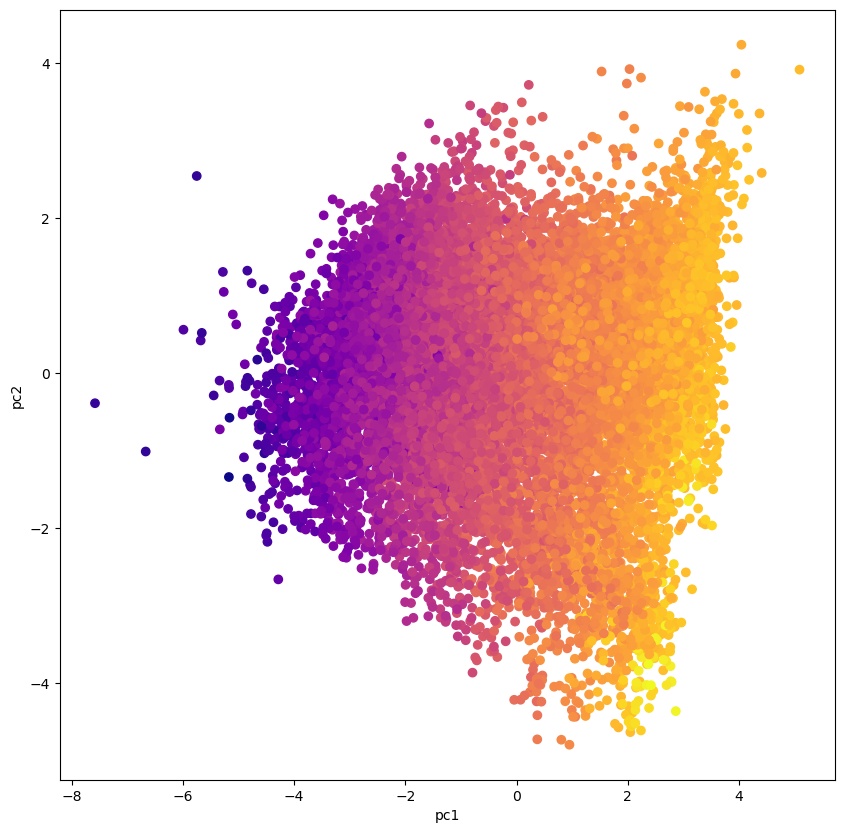

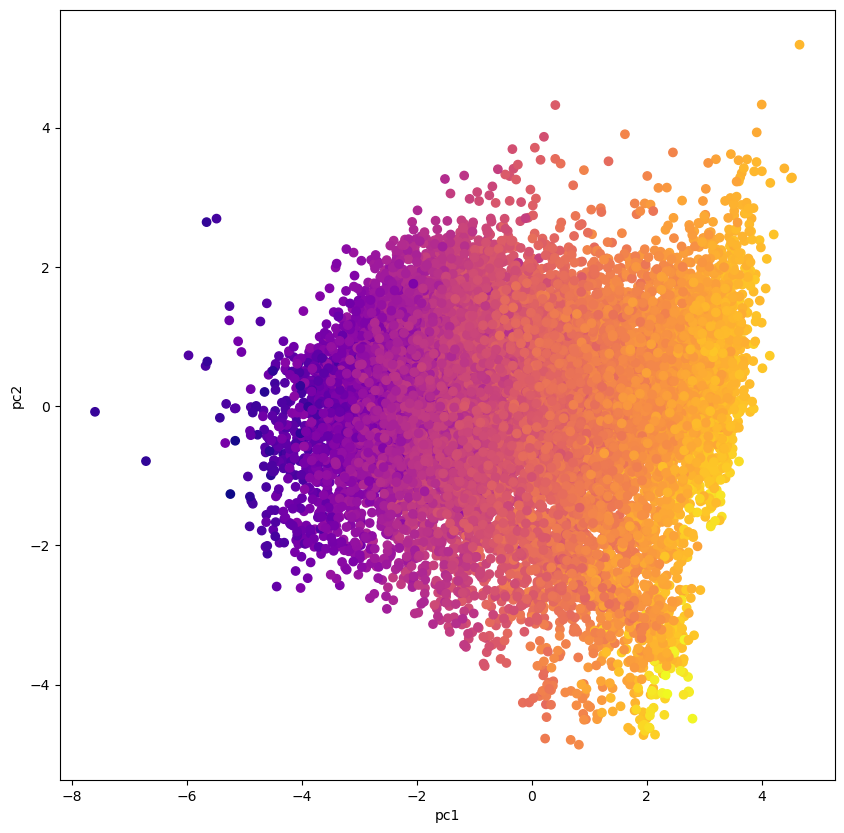

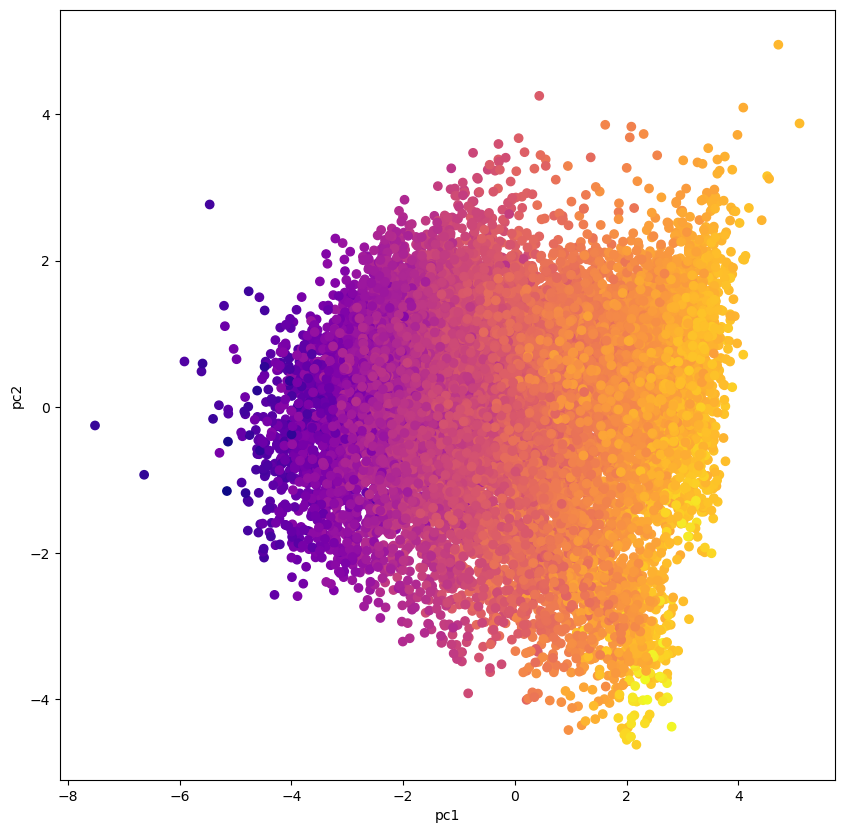

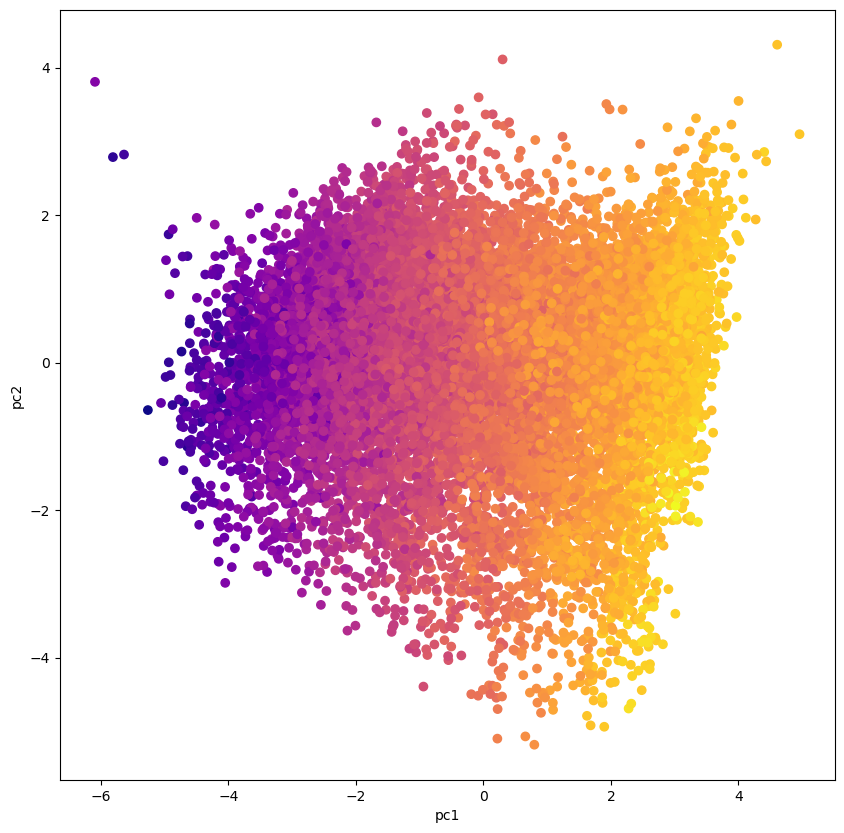

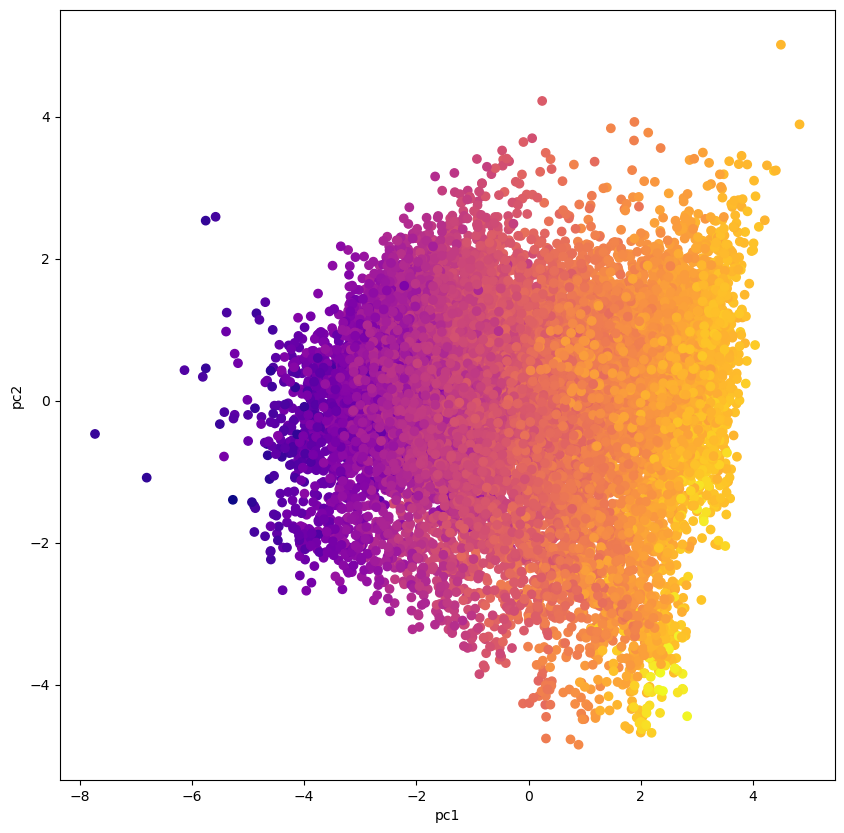

In [7]:
for i in range(5):
    x1 = x[i]
    plt.figure(figsize=(10,10))
    plt.scatter(x1[:,0],x1[:,1],c=df1[i]['temperatures'],cmap='plasma')
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.show()

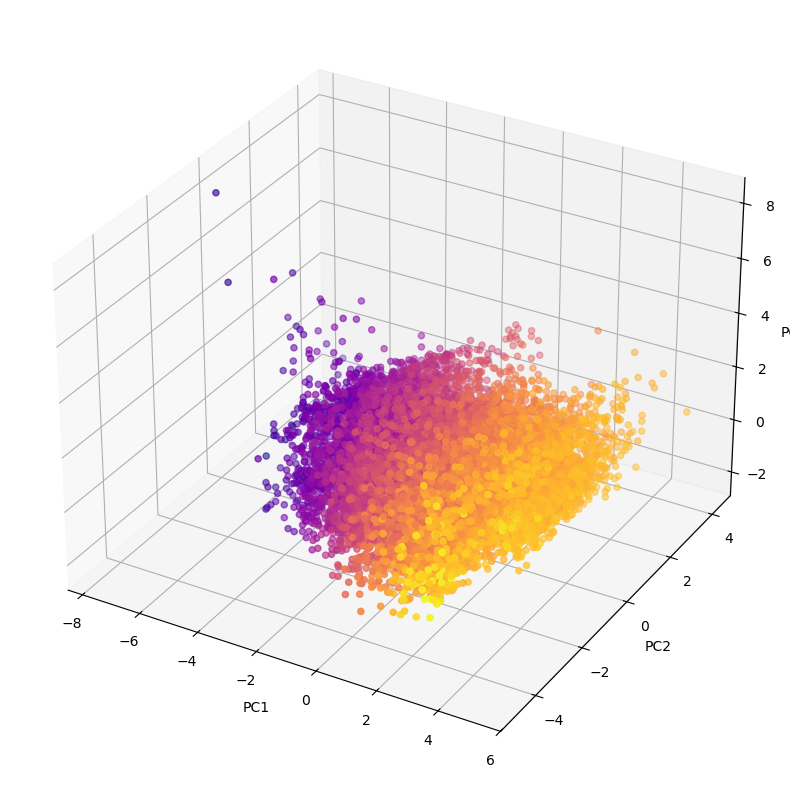

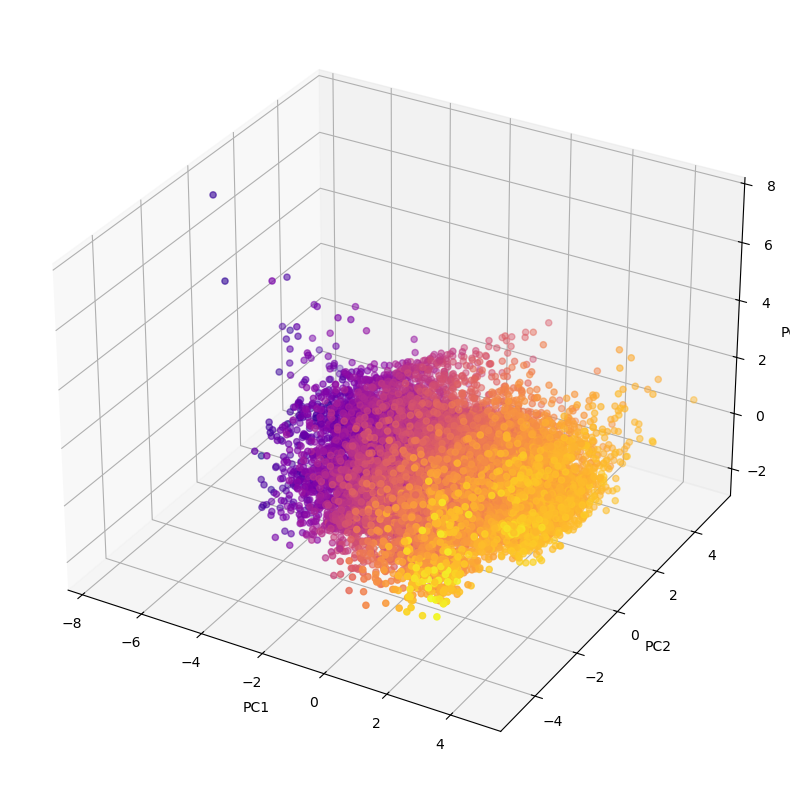

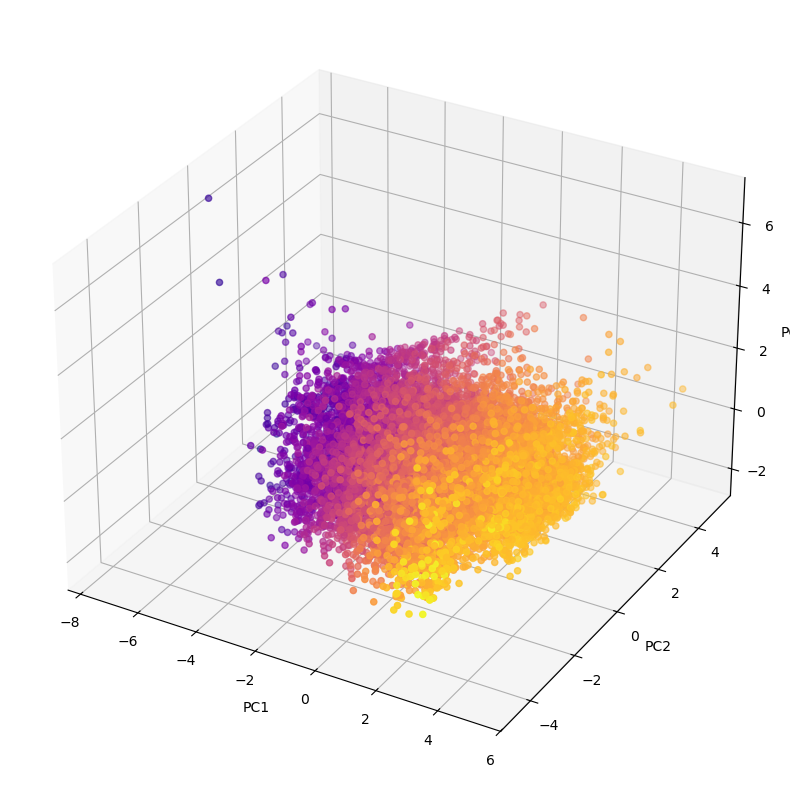

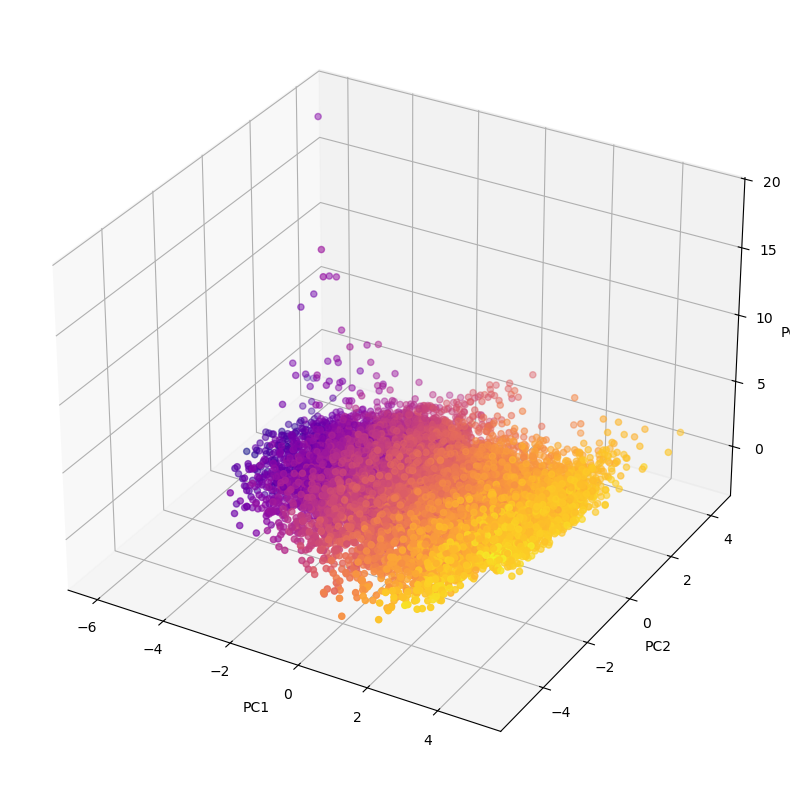

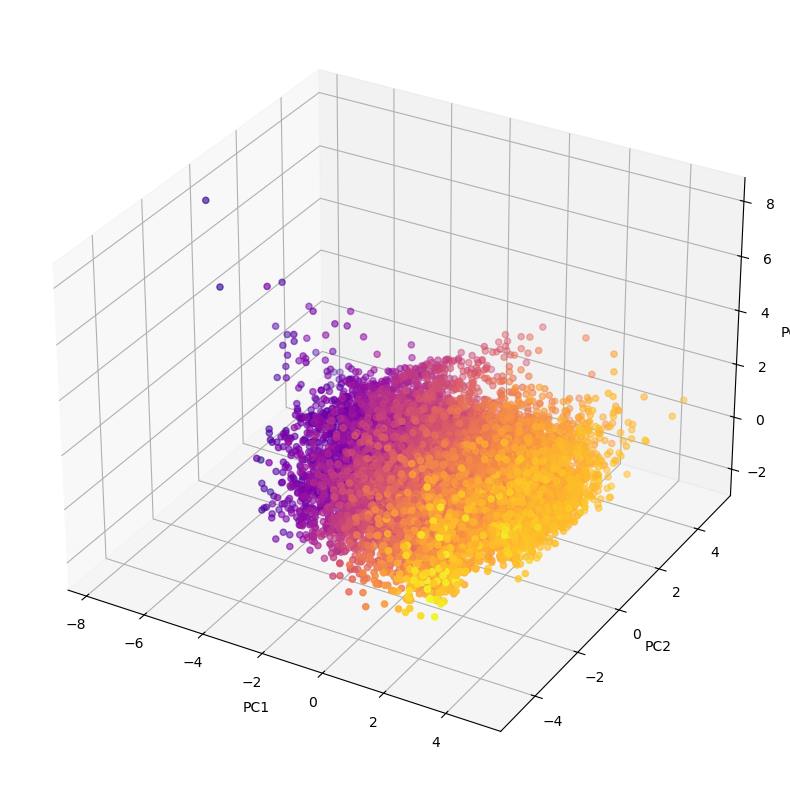

In [8]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D

for i in range(5):
    x1 = x[i]
    fig = plt.figure(figsize=(10,10))

    # choose projection 3d for creating a 3d graph
    axis = fig.add_subplot(111, projection='3d')
    
    # x1[:,0]is pc1,x1[:,1] is pc2 while x1[:,2] is pc3
    axis.scatter(x1[:,0],x1[:,1],x1[:,2], c=df1[i]['temperatures'],cmap='plasma')
    axis.set_xlabel("PC1", fontsize=10)
    axis.set_ylabel("PC2", fontsize=10)
    axis.set_zlabel("PC3", fontsize=10)

    plt.show()

In [9]:
# check how much variance is explained by each principal component
for i in range(5):
    print(principal[i].explained_variance_ratio_)

[0.33851994 0.15453275 0.08933862]
[0.33715633 0.14426076 0.08935361]
[0.33807539 0.14486926 0.08937591]
[0.3424967  0.13699312 0.09027365]
[0.33287129 0.14956722 0.08942049]


In [11]:
v1=0.33851994+0.15453275+0.08933862
v2=0.33715633+0.14426076+0.08935361
v3=0.33807539+0.14486926+0.08937591
v4=0.3424967+0.13699312+0.09027365
v5=0.33287129+0.14956722+0.08942049
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)

0.58239131
0.5707707
0.57232056
0.5697634699999999
0.571859


In [12]:
for i in range(5):
    print(df1[i])

print(df_trimmed)

           slp  wet_bulb_temperature  specific_humidity  water     GHI  \
0      1014.85                  1.46               3.40    1.0   98.38   
1      1020.40                 -2.59               2.19    1.0  140.78   
2      1017.40                  3.96               4.28    1.0  155.35   
3      1012.02                 11.17               7.10    1.0  230.17   
4      1012.81                 14.20               9.10    1.0  241.00   
...        ...                   ...                ...    ...     ...   
15115  1014.97                 26.28              19.85    1.0  256.12   
15116  1013.68                 25.65              19.31    1.0  213.02   
15117  1014.07                 25.29              19.08    1.0  167.31   
15118  1016.49                 22.64              16.06    1.0  137.96   
15119  1018.67                 17.18              11.30    1.0  157.97   

            WDSP  PRCP  SNDP  region  solar_activity   ONI  temperatures  
0       9.241935  0.02   0.0     4.0

In [13]:
for i in range(5):
    print(len(Scaled_data[i]))
    print(len(Scaled_data[i][0]))
    print(Scaled_data[i])

15120
12
[[-0.52482096 -0.92869925 -0.99540463 ... -0.47620471 -0.95940447
  -0.89413443]
 [ 1.22284392 -1.38731055 -1.27893698 ... -0.86255494 -0.68615636
  -1.26727732]
 [ 0.2781602  -0.64560586 -0.78919929 ... -0.56802329 -0.73169771
  -0.59705923]
 ...
 [-0.77043872  1.76974695  2.6787997  ... -0.6351704  -1.34650595
   1.45265685]
 [-0.00839386  1.46966795  1.97114044 ... -0.12953231 -1.54005669
   1.22753758]
 [ 0.67807631  0.85139199  0.85575699 ... -0.41948575 -1.23265257
   0.71870636]]
15120
12
[[ 0.61860065 -0.1999482  -0.52156787 ... -0.47620471 -0.95940447
  -0.11420538]
 [ 1.47761099 -0.59134551 -0.78009653 ... -0.86255494 -0.68615636
  -0.53331393]
 [ 0.75858752  0.11157211 -0.25592374 ... -0.56802329 -0.73169771
   0.24577152]
 ...
 [ 0.29090411  0.07733911 -0.17528177 ... -0.6351704  -1.34650595
   0.14721877]
 [ 1.03856126 -0.1805495  -0.4622723  ... -0.12953231 -1.54005669
  -0.1059062 ]
 [ 0.72677232 -0.88689042 -0.96035505 ... -0.41948575 -1.23265257
  -0.85283232]

In [14]:
for i in range(5):
    print(len(x[i]))
    print(len(x[i][0]))
    print(x[i])

15120
3
[[-2.08225659 -0.91792559 -0.950315  ]
 [-2.8333097  -0.34464271 -1.16178396]
 [-1.55969556 -0.57505785 -0.84137737]
 ...
 [ 3.42394966  2.24757533 -1.01543737]
 [ 2.18904947  1.89781471 -0.8529396 ]
 [ 0.62331018  0.67429045 -1.28836208]]
15120
3
[[-7.63109147e-01  1.14969053e+00 -9.00222537e-01]
 [-1.37512506e+00  1.32044902e+00 -1.15842100e+00]
 [-6.89754578e-02  6.53973325e-01 -8.77729457e-01]
 ...
 [-3.18186965e-01 -2.80282136e-02 -1.38355124e+00]
 [-1.16903156e+00  9.67318108e-05 -1.31845064e+00]
 [-2.11863987e+00  4.01723054e-02 -1.22226420e+00]]
15120
3
[[-0.76612968  1.13809517 -0.88763532]
 [-1.39852701  1.35986321 -1.13961168]
 [-0.08514064  0.65847023 -0.87531027]
 ...
 [-0.33638558 -0.01950499 -1.39295397]
 [-1.19253979  0.03746408 -1.3269314 ]
 [-2.12836369  0.06983832 -1.22319098]]
15120
3
[[-0.89005965  0.93439434 -0.8084737 ]
 [-1.53076085  1.27343188 -1.12298847]
 [-0.20209643  0.48903974 -0.84745071]
 ...
 [-0.45513548 -0.19887814 -1.37835258]
 [-1.32317717 -

In [15]:
for i in range(5):
    print(principal[i].components_)

[[-0.28731801  0.4839573   0.45990472 -0.02559428  0.41613759 -0.16704304
   0.16366583 -0.08103281  0.06550828 -0.00857142  0.0155294   0.48169867]
 [ 0.38669288  0.0462321   0.13988427  0.40286506 -0.25870479 -0.35455973
   0.43516564  0.01037592  0.52964052  0.00334642  0.04032943 -0.04678709]
 [-0.06309065 -0.0096296  -0.01141973 -0.01341317  0.00677822  0.06331442
   0.08318203  0.16707666 -0.02505598  0.670518    0.71162979 -0.00942581]]
[[-0.27100168  0.48509041  0.46310625  0.00938248  0.41695164 -0.19178577
   0.1499885  -0.08132685  0.06243114 -0.00821389  0.01582641  0.4824244 ]
 [ 0.3960524   0.03643451  0.13428459  0.39038451 -0.26924315 -0.32651737
   0.45541318  0.01664297  0.52860973  0.00425672  0.04448421 -0.05633624]
 [-0.08358179 -0.01008425 -0.0121845   0.00173608  0.00990344  0.09847621
   0.0989088   0.15048244 -0.02567491  0.65840407  0.71854127 -0.00898254]]
[[-0.27404514  0.48448759  0.4626133  -0.01982064  0.41467899 -0.17535422
   0.16479146 -0.07855961  0.0

In [16]:
# Dump components relations with features:
for i in range(5):
    print(pd.DataFrame(principal[i].components_,columns=df1[i].columns,index = ['PC-1','PC-2','PC-3']))

           slp  wet_bulb_temperature  specific_humidity     water       GHI  \
PC-1 -0.287318              0.483957           0.459905 -0.025594  0.416138   
PC-2  0.386693              0.046232           0.139884  0.402865 -0.258705   
PC-3 -0.063091             -0.009630          -0.011420 -0.013413  0.006778   

          WDSP      PRCP      SNDP    region  solar_activity       ONI  \
PC-1 -0.167043  0.163666 -0.081033  0.065508       -0.008571  0.015529   
PC-2 -0.354560  0.435166  0.010376  0.529641        0.003346  0.040329   
PC-3  0.063314  0.083182  0.167077 -0.025056        0.670518  0.711630   

      temperatures  
PC-1      0.481699  
PC-2     -0.046787  
PC-3     -0.009426  
           slp  wet_bulb_temperature  specific_humidity     water       GHI  \
PC-1 -0.271002              0.485090           0.463106  0.009382  0.416952   
PC-2  0.396052              0.036435           0.134285  0.390385 -0.269243   
PC-3 -0.083582             -0.010084          -0.012184  0.001736

In [17]:
coef1 = []
j = np.identity(df1[0].shape[1])

for i in range(5):
    coef1.append(principal[i].transform(j))

    #linear coefficients for PC-1, PC-2, and PC-3
    pd.DataFrame(coef1[i], columns=['PC-1', 'PC-2', 'PC-3'], index=df1[i].columns)

    print(coef1[i])

[[-0.28731801  0.38669288 -0.06309065]
 [ 0.4839573   0.0462321  -0.0096296 ]
 [ 0.45990472  0.13988427 -0.01141973]
 [-0.02559428  0.40286506 -0.01341317]
 [ 0.41613759 -0.25870479  0.00677822]
 [-0.16704304 -0.35455973  0.06331442]
 [ 0.16366583  0.43516564  0.08318203]
 [-0.08103281  0.01037592  0.16707666]
 [ 0.06550828  0.52964052 -0.02505598]
 [-0.00857142  0.00334642  0.670518  ]
 [ 0.0155294   0.04032943  0.71162979]
 [ 0.48169867 -0.04678709 -0.00942581]]
[[-0.27100168  0.3960524  -0.08358179]
 [ 0.48509041  0.03643451 -0.01008425]
 [ 0.46310625  0.13428459 -0.0121845 ]
 [ 0.00938248  0.39038451  0.00173608]
 [ 0.41695164 -0.26924315  0.00990344]
 [-0.19178577 -0.32651737  0.09847621]
 [ 0.1499885   0.45541318  0.0989088 ]
 [-0.08132685  0.01664297  0.15048244]
 [ 0.06243114  0.52860973 -0.02567491]
 [-0.00821389  0.00425672  0.65840407]
 [ 0.01582641  0.04448421  0.71854127]
 [ 0.4824244  -0.05633624 -0.00898254]]
[[-0.27404514  0.40865864 -0.07806602]
 [ 0.48448759  0.036178

In [18]:
print(len(coef1))

5


In [19]:
unscaled_data = []

for i in range(5):
    unscaled_data.append(scaling[i].inverse_transform(Scaled_data[i]))
    print(unscaled_data[i])

[[ 1.01485e+03  1.46000e+00  3.40000e+00 ...  2.09000e+01 -9.10000e-01
   4.89000e+00]
 [ 1.02040e+03 -2.59000e+00  2.19000e+00 ...  5.71000e+00 -6.70000e-01
   1.26000e+00]
 [ 1.01740e+03  3.96000e+00  4.28000e+00 ...  1.72900e+01 -7.10000e-01
   7.78000e+00]
 ...
 [ 1.01407e+03  2.52900e+01  1.90800e+01 ...  1.46500e+01 -1.25000e+00
   2.77200e+01]
 [ 1.01649e+03  2.26400e+01  1.60600e+01 ...  3.45300e+01 -1.42000e+00
   2.55300e+01]
 [ 1.01867e+03  1.71800e+01  1.13000e+01 ...  2.31300e+01 -1.15000e+00
   2.05800e+01]]
[[ 1.01853e+03  7.76000e+00  5.39000e+00 ...  2.09000e+01 -9.10000e-01
   1.22100e+01]
 [ 1.02123e+03  4.33000e+00  4.30000e+00 ...  5.71000e+00 -6.70000e-01
   8.17000e+00]
 [ 1.01897e+03  1.04900e+01  6.51000e+00 ...  1.72900e+01 -7.10000e-01
   1.56800e+01]
 ...
 [ 1.01750e+03  1.01900e+01  6.85000e+00 ...  1.46500e+01 -1.25000e+00
   1.47300e+01]
 [ 1.01985e+03  7.93000e+00  5.64000e+00 ...  3.45300e+01 -1.42000e+00
   1.22900e+01]
 [ 1.01887e+03  1.74000e+00  3.5

In [20]:
coef_df = []

for i in range(5):
    print(coef1[i])
    coef_df.append(pd.DataFrame(coef1[i], columns=['PC-1', 'PC-2', 'PC-3'], index=df1[i].columns))

[[-0.28731801  0.38669288 -0.06309065]
 [ 0.4839573   0.0462321  -0.0096296 ]
 [ 0.45990472  0.13988427 -0.01141973]
 [-0.02559428  0.40286506 -0.01341317]
 [ 0.41613759 -0.25870479  0.00677822]
 [-0.16704304 -0.35455973  0.06331442]
 [ 0.16366583  0.43516564  0.08318203]
 [-0.08103281  0.01037592  0.16707666]
 [ 0.06550828  0.52964052 -0.02505598]
 [-0.00857142  0.00334642  0.670518  ]
 [ 0.0155294   0.04032943  0.71162979]
 [ 0.48169867 -0.04678709 -0.00942581]]
[[-0.27100168  0.3960524  -0.08358179]
 [ 0.48509041  0.03643451 -0.01008425]
 [ 0.46310625  0.13428459 -0.0121845 ]
 [ 0.00938248  0.39038451  0.00173608]
 [ 0.41695164 -0.26924315  0.00990344]
 [-0.19178577 -0.32651737  0.09847621]
 [ 0.1499885   0.45541318  0.0989088 ]
 [-0.08132685  0.01664297  0.15048244]
 [ 0.06243114  0.52860973 -0.02567491]
 [-0.00821389  0.00425672  0.65840407]
 [ 0.01582641  0.04448421  0.71854127]
 [ 0.4824244  -0.05633624 -0.00898254]]
[[-0.27404514  0.40865864 -0.07806602]
 [ 0.48448759  0.036178

In [21]:
for i in range(5):
    print(coef_df[i])

                          PC-1      PC-2      PC-3
slp                  -0.287318  0.386693 -0.063091
wet_bulb_temperature  0.483957  0.046232 -0.009630
specific_humidity     0.459905  0.139884 -0.011420
water                -0.025594  0.402865 -0.013413
GHI                   0.416138 -0.258705  0.006778
WDSP                 -0.167043 -0.354560  0.063314
PRCP                  0.163666  0.435166  0.083182
SNDP                 -0.081033  0.010376  0.167077
region                0.065508  0.529641 -0.025056
solar_activity       -0.008571  0.003346  0.670518
ONI                   0.015529  0.040329  0.711630
temperatures          0.481699 -0.046787 -0.009426
                          PC-1      PC-2      PC-3
slp                  -0.271002  0.396052 -0.083582
wet_bulb_temperature  0.485090  0.036435 -0.010084
specific_humidity     0.463106  0.134285 -0.012184
water                 0.009382  0.390385  0.001736
GHI                   0.416952 -0.269243  0.009903
WDSP                 -0.191786 

In [22]:
for i in range(5):
    print(Scaled_data[i])

[[-0.52482096 -0.92869925 -0.99540463 ... -0.47620471 -0.95940447
  -0.89413443]
 [ 1.22284392 -1.38731055 -1.27893698 ... -0.86255494 -0.68615636
  -1.26727732]
 [ 0.2781602  -0.64560586 -0.78919929 ... -0.56802329 -0.73169771
  -0.59705923]
 ...
 [-0.77043872  1.76974695  2.6787997  ... -0.6351704  -1.34650595
   1.45265685]
 [-0.00839386  1.46966795  1.97114044 ... -0.12953231 -1.54005669
   1.22753758]
 [ 0.67807631  0.85139199  0.85575699 ... -0.41948575 -1.23265257
   0.71870636]]
[[ 0.61860065 -0.1999482  -0.52156787 ... -0.47620471 -0.95940447
  -0.11420538]
 [ 1.47761099 -0.59134551 -0.78009653 ... -0.86255494 -0.68615636
  -0.53331393]
 [ 0.75858752  0.11157211 -0.25592374 ... -0.56802329 -0.73169771
   0.24577152]
 ...
 [ 0.29090411  0.07733911 -0.17528177 ... -0.6351704  -1.34650595
   0.14721877]
 [ 1.03856126 -0.1805495  -0.4622723  ... -0.12953231 -1.54005669
  -0.1059062 ]
 [ 0.72677232 -0.88689042 -0.96035505 ... -0.41948575 -1.23265257
  -0.85283232]]
[[ 0.60837193 -0

In [25]:
for i in range(5):
    print("PC-1 ("+str(i)+"):")
    print(pd.array(coef_df[i]['PC-1']))
    print("PC-2 ("+str(i)+"):")
    print(pd.array(coef_df[i]['PC-2']))
    print("PC-3 ("+str(i)+"):")
    print(pd.array(coef_df[i]['PC-3']))

PC-1 (0):
<NumpyExtensionArray>
[-0.28731800981460526,  0.48395729922861835,  0.45990472472189203,
 -0.02559427935381913,  0.41613759388216953, -0.16704303874841264,
   0.1636658271006681, -0.08103280710930232,    0.065508282317978,
 -0.00857142107748782, 0.015529403170669736,   0.4816986729305626]
Length: 12, dtype: float64
PC-2 (0):
<NumpyExtensionArray>
[   0.3866928758416155,  0.046232100017490445,   0.13988427414310114,
   0.40286506419823404,   -0.2587047923549897,   -0.3545597287075665,
   0.43516563890460624,  0.010375918513641141,    0.5296405243722665,
 0.0033464246241597887,    0.0403294320094352,  -0.04678709351048939]
Length: 12, dtype: float64
PC-3 (0):
<NumpyExtensionArray>
[ -0.06309064667784685,  -0.00962960096636098, -0.011419729189752925,
 -0.013413172458893613,  0.006778220045848715,    0.0633144217518143,
   0.08318203010506463,   0.16707665920353348, -0.025055980959167546,
     0.670518001714378,    0.7116297903691867, -0.009425809211244288]
Length: 12, dtype: flo

In [28]:
for i in range(5):
    print(scaling[i].inverse_transform(Scaled_data[i]))

[[ 1.01485e+03  1.46000e+00  3.40000e+00 ...  2.09000e+01 -9.10000e-01
   4.89000e+00]
 [ 1.02040e+03 -2.59000e+00  2.19000e+00 ...  5.71000e+00 -6.70000e-01
   1.26000e+00]
 [ 1.01740e+03  3.96000e+00  4.28000e+00 ...  1.72900e+01 -7.10000e-01
   7.78000e+00]
 ...
 [ 1.01407e+03  2.52900e+01  1.90800e+01 ...  1.46500e+01 -1.25000e+00
   2.77200e+01]
 [ 1.01649e+03  2.26400e+01  1.60600e+01 ...  3.45300e+01 -1.42000e+00
   2.55300e+01]
 [ 1.01867e+03  1.71800e+01  1.13000e+01 ...  2.31300e+01 -1.15000e+00
   2.05800e+01]]
[[ 1.01853e+03  7.76000e+00  5.39000e+00 ...  2.09000e+01 -9.10000e-01
   1.22100e+01]
 [ 1.02123e+03  4.33000e+00  4.30000e+00 ...  5.71000e+00 -6.70000e-01
   8.17000e+00]
 [ 1.01897e+03  1.04900e+01  6.51000e+00 ...  1.72900e+01 -7.10000e-01
   1.56800e+01]
 ...
 [ 1.01750e+03  1.01900e+01  6.85000e+00 ...  1.46500e+01 -1.25000e+00
   1.47300e+01]
 [ 1.01985e+03  7.93000e+00  5.64000e+00 ...  3.45300e+01 -1.42000e+00
   1.22900e+01]
 [ 1.01887e+03  1.74000e+00  3.5

In [35]:
for i in range(5):
    c_df=coef_df[i]
    print(scaling[i].inverse_transform(np.array(c_df['PC-1']).reshape(1, -1)))

[[ 1.01560423e+03  1.39351813e+01  9.61066459e+00  8.23794909e-01
   2.18650699e+02  5.88976363e+00  1.11372060e-01 -3.98773501e-04
   4.41633795e+00  3.92857781e+01 -5.36935069e-02  1.82743474e+01]]
[[ 1.01573384e+03  1.37633177e+01  9.54155044e+00  8.48631529e-01
   2.16607701e+02  5.81431425e+00  1.11848526e-01 -6.05097551e-04
   4.37939637e+00  3.92998349e+01 -5.34326350e-02  1.79612172e+01]]
[[ 1.01573916e+03  1.38427381e+01  9.60898637e+00  8.13837404e-01
   2.16881395e+02  5.89645590e+00  1.13387547e-01 -7.14817320e-04
   4.44882633e+00  3.93064893e+01 -5.37970816e-02  1.80766227e+01]]
[[ 1.01580093e+03  1.44859505e+01  1.00660467e+01  8.68204032e-01
   2.16836174e+02  5.97444895e+00  1.20364307e-01  2.01156145e-03
   4.60317378e+00  3.92946019e+01 -5.39652614e-02  1.86144190e+01]]
[[ 1.01568261e+03  1.40522915e+01  9.70264460e+00  8.18516811e-01
   2.18096957e+02  5.80532370e+00  1.14220808e-01 -2.36736227e-03
   4.46180736e+00  3.92999337e+01 -5.36386435e-02  1.83118622e+01]]


In [36]:
unit_vector = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
Scaled_unit_vector = []

for i in range(5):
    Scaled_unit_vector.append(scaling[i].inverse_transform(unit_vector.reshape(1, -1)))
    print(Scaled_unit_vector[i])

[[1.01969232e+03 1.84923585e+01 1.19155701e+01 1.20601133e+00
  2.63311420e+02 8.39592887e+00 1.81785293e-01 7.27453110e-01
  5.77024348e+00 7.89394362e+01 8.10989310e-01 2.33164742e+01]]
[[1.01972880e+03 1.82757143e+01 1.18051841e+01 1.20691566e+00
  2.61625737e+02 8.27257146e+00 1.82916780e-01 7.25920140e-01
  5.78628107e+00 7.89394362e+01 8.10989310e-01 2.29503911e+01]]
[[1.01976861e+03 1.84072682e+01 1.19054360e+01 1.20442162e+00
  2.61754962e+02 8.41236824e+00 1.84319847e-01 7.13827679e-01
  5.82666320e+00 7.89394362e+01 8.10989310e-01 2.31155103e+01]]
[[1.01977447e+03 1.90772049e+01 1.24217054e+01 1.20639589e+00
  2.60339160e+02 8.55495642e+00 1.91734876e-01 2.06972341e-01
  5.83184441e+00 7.89394362e+01 8.10989310e-01 2.36132517e+01]]
[[1.01970683e+03 1.85250038e+01 1.19919733e+01 1.20442162e+00
  2.62265334e+02 8.27449745e+00 1.87047174e-01 7.25487338e-01
  5.81941023e+00 7.89394362e+01 8.10989310e-01 2.32260670e+01]]


In [39]:
for i in range(5):
    print(Scaled_unit_vector[i])

[[1.01969232e+03 1.84923585e+01 1.19155701e+01 1.20601133e+00
  2.63311420e+02 8.39592887e+00 1.81785293e-01 7.27453110e-01
  5.77024348e+00 7.89394362e+01 8.10989310e-01 2.33164742e+01]]
[[1.01972880e+03 1.82757143e+01 1.18051841e+01 1.20691566e+00
  2.61625737e+02 8.27257146e+00 1.82916780e-01 7.25920140e-01
  5.78628107e+00 7.89394362e+01 8.10989310e-01 2.29503911e+01]]
[[1.01976861e+03 1.84072682e+01 1.19054360e+01 1.20442162e+00
  2.61754962e+02 8.41236824e+00 1.84319847e-01 7.13827679e-01
  5.82666320e+00 7.89394362e+01 8.10989310e-01 2.31155103e+01]]
[[1.01977447e+03 1.90772049e+01 1.24217054e+01 1.20639589e+00
  2.60339160e+02 8.55495642e+00 1.91734876e-01 2.06972341e-01
  5.83184441e+00 7.89394362e+01 8.10989310e-01 2.36132517e+01]]
[[1.01970683e+03 1.85250038e+01 1.19919733e+01 1.20442162e+00
  2.62265334e+02 8.27449745e+00 1.87047174e-01 7.25487338e-01
  5.81941023e+00 7.89394362e+01 8.10989310e-01 2.32260670e+01]]


In [45]:
for j in range(5):
    print("Fold "+str(j)+":")
    print("PC-1:")
    for i in range(12):
        c_df = coef_df[j]
        scaled_vector = Scaled_unit_vector[j]
        print(c_df['PC-1'].iloc[i]/scaled_vector[0, i])
    print("PC-2:")
    for i in range(12):
        c_df = coef_df[j]
        scaled_vector = Scaled_unit_vector[j]
        print(c_df['PC-2'].iloc[i]/scaled_vector[0, i])
    print("PC-3:")
    for i in range(12):
        c_df = coef_df[j]
        scaled_vector = Scaled_unit_vector[j]
        print(c_df['PC-3'].iloc[i]/scaled_vector[0, i])

Fold 0:
PC-1:
-0.00028176931764668626
0.026170663864140402
0.03859695503456382
-0.021222254489651003
0.0015804008580319233
-0.01989571867157272
0.9003249093319513
-0.11139248153912167
0.011352776117285883
-0.00010858224347567376
0.01914871499494342
0.020659155758202628
PC-2:
0.00037922505392207434
0.0025000650909069175
0.011739620727768681
0.3340474955052306
-0.0009825050219581107
-0.04222995862317504
2.3938440377671912
0.014263350273959833
0.09178824544129542
4.239230461654153e-05
0.049728685060812794
-0.0020066109927733295
PC-3:
-6.187223862428905e-05
-0.000520734061534188
-0.0009583871405329107
-0.011121929064736183
2.5742218280383747e-05
0.007541086012717021
0.4575839381933154
0.22967344141051274
-0.004342274475274124
0.00849408146663021
0.8774835637874167
-0.00040425533966598085
Fold 1:
PC-1:
-0.0002657585840712745
0.026542897727922583
0.039229057614904334
0.007773933953937286
0.0015936950521550858
-0.023183332256757744
0.819982163771652
-0.11203277473297055
0.0107895096815146
-0.

In [47]:
#Generate Principal Component coefficients to use with unscaled predictor variables
PC_coef1 = [] # Contains PC-1 coefficients for all features
PC_coef2 = [] # Contains PC-2 coefficients for all features
PC_coef3 = [] # Contains PC-3 coefficients for all features

for i in range(12):
    sum1=0 # Tracks PC-1
    sum2=0 # Tracks PC-2
    sum3=0 # Tracks PC-3
    for j in range(5):
        c_df = coef_df[j]
        scaled_vector = Scaled_unit_vector[j]
        sum1 += c_df['PC-1'].iloc[i]/scaled_vector[0, i]
        sum2 += c_df['PC-2'].iloc[i]/scaled_vector[0, i]
        sum3 += c_df['PC-3'].iloc[i]/scaled_vector[0, i]
    sum1 = sum1/5.0
    sum2 = sum2/5.0
    sum3 = sum3/5.0
    PC_coef1.append(sum1)
    PC_coef2.append(sum2)
    PC_coef3.append(sum3)

print(PC_coef1)
print(PC_coef2)
print(PC_coef3)

[-0.00027142444671095114, 0.02612099652246071, 0.03858206487628417, -0.007657996292452533, 0.0015921220118329453, -0.02087341214251253, 0.856438868924805, -0.14682052932823572, 0.011922078537487339, -0.00010486097604290856, 0.01913198239738893, 0.020759071689292388]
[0.000394395770028403, 0.002203502154932371, 0.010515308260679567, 0.3247905501114815, -0.000997585611417932, -0.04421499917389814, 2.3406061414418904, 0.06103442934369398, 0.0884083605357645, 9.018400840240695e-05, 0.05678270006595924, -0.002022259147506325]
[-7.997955043707622e-05, -0.00061235670213747, -0.001063071162688523, -0.018550530087942847, 1.95568082206193e-05, 0.011699873888675681, 0.6076288144823113, 0.4663814597174822, -0.002995370416077908, 0.008185112054665114, 0.881530981699169, -0.0004730481627188983]


In [48]:
print(columns_list)

['slp', 'wet_bulb_temperature', 'specific_humidity', 'water', 'GHI', 'WDSP', 'PRCP', 'SNDP', 'region', 'solar_activity', 'ONI']
